# $$Dados~de ~Contagem$$


### $$Conceito:$$
    
Os modelos de **regressão Poisson e binomial negativo** fazem parte do que é conhecido por **modelos de regressão** para **dados de contagem**, e têm por objetivo analisar o comportamento, em função de variáveis explicativa, de uma determinada **variável dependente** que se apresenta na forma:

- **Quantitativa**

- **Valores discretos** 

- **Não negativos**

- **Definir a Exposição (unidade temporal, espacial, social, etc.)**


**λ (Lambda)** = É o valor da variável Y que tem a maior ocorrencia nos dados ou a taxa média estimada de incidência do fenômeno em estudo para uma dada exposição.


### $$Tipos~de~Dados~de~Contagem:$$

Temos **4 tipos** de dados de Contagem:

- **Poisson** 

- **Binomial Negativo**

- **Poisson Inflacionados de Zero**

- **BN Inflacionados de Zero** 


**OBS: as características na variável y que determina qual distribuição escolher**






### $$Poisson ~X ~Binomial~ Negativa:$$


**Poisson** = Cauda curta no histograma de frequência (Inexistência de Superdispersão), Média = Variância


**Binomial Negativo (NB2)** = Cauda Longa no histograma de frequência(Superdispersão)


**Teste de Superdispersão:**


- Teste para verificar se há ou não superdispersão nos dados (Média # Variância)

    - **Equidispersão** = Distribuição Poisson (Media = Variância)
    - **Superdispersão** = Distribuição Binomial Negativa








### $$Poisson~inflacionados~ de~ zeros(ZIP) ~X ~Binomial~ Negativo ~Inflacionado~ de~ Zeros (ZINB):$$


São considerados uma **combinação entre um modelo para dados de contagem e um modelo para dados binários**, já que são utilizados para investigar as razões que levam a determinada quantidade de ocorrências (contagens) de um fenômeno, bem como as razões que  levam (ou não) à ocorrência propriamente dita deste fenômeno, independentemente da quantidade de contagens observadas

Enquanto um modelo **Poisson inflacionado de zeros** é estimado a partir da **combinação de uma distribuição Bernoulli com uma distribuição Poisson**, um **modelo binomial negativo inflacionado de zeros** é estimado por meio da **combinação de uma distribuição Bernoulli com uma distribuição Poisson-Gama**


**ZIP:** 

- Combinação de uma distribuição Bernoulli com uma distribuição Poisson

- Os modelos de regressão Poisson inflacionados de zeros apresentam dois processos geradores de zeros, sendo um devido à distribuição binária (neste caso, são gerados os chamados zeros estruturais) e outro devido à distribuição Poisson (nesta situação, são gerados dados de contagem, entre os quais os chamados zeros amostrais)


**ZINB:** 

- É estimado por meio da combinação de uma distribuição Bernoulli com uma distribuição Binomial Negativo


- Já em relação aos modelos de regressão do tipo binomial negativo inflacionados de zeros, podemos definir que, enquanto a probabilidade p de ocorrência de nenhuma contagem para dada observação i, ou seja, p(Yi = 0), é também calculada levando-se em consideração a soma de um componente dicotômico com um componente de contagem



**Teste de Vuong**:

- **Ocorrência ou não de inflação de Zeros na variável Y**








__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo~Geral:$$  

## $$Verificar~qual~modelo~é ~o ~mais~adequado$$$$utilizando~dados~de~contagem$$


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
#Pacotes
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Banco de dados 

In [2]:
# Carregando o dataset

dados = pd.read_csv('corruption.csv',encoding='latin1',sep=',')
dados = dados.set_index('country')
dados =dados.iloc[:,1:]
dados

,violations,staff,post,corruption
country,,,,
Angola,50,9,no,1.047506
Angola,1,9,yes,1.047506
Albania,17,3,no,0.921079
Albania,0,3,yes,0.921079
United Arab Emirates,0,3,no,-0.779468
...,...,...,...,...
Zaire,0,6,yes,1.582807
Zambia,37,9,no,0.562193
Zambia,0,9,yes,0.562193


**Tabela com 298 observações e 4 variáveis**

# $$Dicionário~ de~ Dados~ das~ Variáveis$$ 

### **$$Variáveis:$$**


- **country:** País do corpo diplomático, 2 observações por país


- **violations:** Quantidade de violações de trânsito, variável Target


- **staff:** Quantidade de staff no corpo diplomático

    
- **post:** Multas por países em NY antes e depois da Lei, No = Antes da lei de trânsito, Yes = Após a lei de trânsito


- **corruption:** Índice de percepção de corrupção no país por parte da população


# Análise Exploratória

In [3]:
#Info da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, Angola to Zimbabwe
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   violations  298 non-null    int64  
 1   staff       298 non-null    int64  
 2   post        298 non-null    object 
 3   corruption  298 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 11.6+ KB


**Variável target discreta (violations), e 3 variáveis explicativas, sendo uma qualitativa e 2 quantitativas**

In [4]:
#Estatistica Descritivas(Variáveis Numericas)
dados.describe()

,violations,staff,corruption
count,298.000000,298.000000,298.000000
mean,6.496644,11.805369,0.013641
std,18.210377,11.079558,1.012474
min,0.000000,2.000000,-2.582988
25%,0.000000,6.000000,-0.415147
50%,0.000000,9.000000,0.326959
75%,3.000000,14.000000,0.720250
max,167.000000,86.000000,1.582807


In [5]:
#Estatistica Descritivas(Variável Categorica)

#Tabela de frequencia
dados.post.value_counts().to_frame()

,post
no,149
yes,149


**Equilíbrio nos dados na variável categórica**

In [6]:
#Verificar a media e variância nos dados
me=dados.violations.mean()
import statistics as sts
va=sts.variance(dados.violations)
print(f'Media= {me}\nVariancia= {va}')

Media= 6.496644295302014
Variancia= 331.6178338191761


**Diagnóstico preliminar para observação de eventual igualdade entre a média e a variância da variável dependente 'violations'**

**Quando a média for muito distante da variância já é o 1° indício de existência de Superdispersão nos dados**

# Plots

### Histograma da variável target

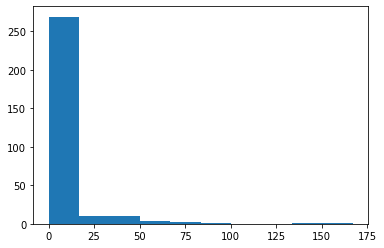

0      156
1       35
3       17
2       16
5       10
4        5
12       5
7        4
13       4
10       3
8        3
9        3
6        3
16       3
44       2
37       2
61       2
21       2
43       2
18       2
27       2
17       2
99       1
56       1
59       1
69       1
150      1
50       1
24       1
40       1
167      1
22       1
45       1
67       1
14       1
48       1
15       1
Name: violations, dtype: int64

In [7]:
#Frequencia dos dados da variavel Target
import matplotlib.pyplot as plt
plt.hist(dados.violations)
plt.show()
dados.violations.value_counts(ascending=False)

**Note que a maioria dos dados tem valor igual a 0 e há variação grande nos dados** 

### Gráfico de dispersão e análise descritiva: Variável post

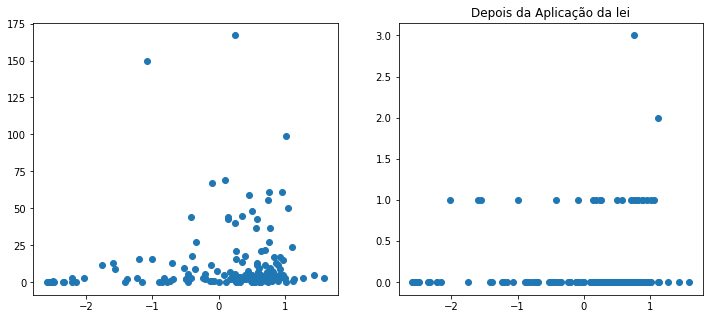

In [8]:
#Plot com as labels separado pela coluna post (antes e depois da lei)
a = dados[dados.post =='no']
b = dados[dados.post =='yes']

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))

axes[0].scatter(a.corruption,a.violations)
axes[1].scatter(b.corruption,b.violations);
plt.title('Depois da Aplicação da lei');

In [9]:
#Análise descritiva
dados.groupby('post')['violations'].sum().to_frame()

,violations
post,
no,1910
yes,26


**Note a diferença no número de multas antes e depois da aplicação da lei**

# Modelagem:

In [10]:
#Transformar a variável post em dummy referenciando a coluna Post_no
post_dum = pd.get_dummies(dados['post'],drop_first=True)
dados['Post_yes'] = post_dum

#Excluir a variável post type: Object
dados = dados.drop('post',axis=1)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, Angola to Zimbabwe
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   violations  298 non-null    int64  
 1   staff       298 non-null    int64  
 2   corruption  298 non-null    float64
 3   Post_yes    298 non-null    uint8  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 9.6+ KB


**Observe que o dataframe não possui mais colunas do type object**

In [11]:
#Separar as variáveis X e Y

x = dados.iloc[:,1:]
y = dados['violations']

# Modelo Poisson

In [12]:
#Modelo
import statsmodels.api as sm
from statsmodels.api import Poisson
x_intercept = sm.add_constant(x)
mod1 = sm.GLM(y.values,x_intercept, family=sm.families.Poisson())
modpoisson= mod1.fit()
print(modpoisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.8
Date:                Tue, 19 Jul 2022   Deviance:                       3644.0
Time:                        11:50:23   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2127      0.031     71.134      0.0

**Todas as variáveis são estatisticamente significantes**

In [13]:
#Lambda
np.mean(dados.violations)

6.496644295302014

**Lambda é igual a média dos dados da variável Y**

In [14]:
#LogLike 
modpoisson.llf

-2071.7937527648533

**OBS: Precisamos fazer o teste de superdispersão para saber se o modelo Poisson é o mais adequado**

# Teste de Superdispersão(Utilizando o modelo Poisson)


**Teste para verificar se há ou não superdispersão nos dados**

- **Equidispersão** = Distribuição Poisson (Media = Variância)


- **Superdispersão** = Distribuição Binomial Negativa


## Passo a Passo

- **1º Passo: Estimar um modelo Poisson**
    
    
- **2º Passo: Criar uma nova variável (Y*) utilizando os fitted values do modelo Poisson**


- **3º Passo: Estimar um modelo auxiliar OLS, com a variável Y* como variável dependente, os fitted values do modelo Poisson como única variável preditora e sem o intercepto**


- **4º Passo: Observar a significância do parâmetro beta**

**Caso o p-value do parâmetro do lambda Poisson seja maior que 0.05,
verifica-se a existência de equidispersão (Média = Variância) nos dados, ou seja, a variável y tem uma distribuição Poisson.
Caso contrário, diagnostica-se a existência de superdispersão nos dados, fato
que favorecerá a estimação de um modelo binomial negativo (Variância superior a media)**





In [15]:
#1°Modelo Poisson

modpoisson

#2º Criar a variável Y* utilizando os fitted values do modelo poisson
lambda_poi=modpoisson.predict(x_intercept)

ystars = (((y - lambda_poi)**2) - y)/lambda_poi

#3º Estimar um modelo auxiliar OLS

#Teste de Superdispersão
import warnings
warnings.filterwarnings('ignore')

#Transformar a variavel y* em formato pandas para criação do modelo
ys = pd.DataFrame(ystars)

#Add valor 0 na constante
x_int_lamda = pd.DataFrame(x_intercept.const*0) 

# Unir a variável lambda com a constante 
x_int_lamda['lambda'] = pd.DataFrame(lambda_poi)

#Estimando o modelo auxiliar GLM sem o intercepto 
mod_reg=sm.OLS(ys,x_int_lamda).fit()
print(mod_reg.summary())


                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.022
Method:                 Least Squares   F-statistic:                              7.584
Date:                Tue, 19 Jul 2022   Prob (F-statistic):                     0.00625
Time:                        11:50:23   Log-Likelihood:                         -1952.9
No. Observations:                 298   AIC:                                      3908.
Df Residuals:                     297   BIC:                                      3911.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
#4° Observar a significancia do parâmetro beta

print(f'P_value: {mod_reg.pvalues[1]}')

P_value: 0.006252985352426318


**P_value < 0.05, portanto verifica-se a existência de superdispersão nos dados, estimação do modelo binomial negativo será a mais adequada**

# Distribuição Binomial Negativa

- **Delta = taxa de decaimento, quanto maior o valor do Delta, mais rápido o caimento nos dados**


- **Theta = Parâmetro de forma da distribuição Poisson-Gama (binomial negativa), ajuste na concentração ou forma dos dados**


- **Phi = Representa a superdispersão dos dados, no modelo é encontrado com nome ALPHA**


In [17]:
#Modelo Binomial Negativo
import statsmodels.api as sm
from statsmodels.api import Poisson
x_intercept = sm.add_constant(x)
mod1 = sm.NegativeBinomial(y.values,x_intercept)
modbn= mod1.fit()
modbn.summary2()

Optimization terminated successfully.
         Current function value: 1.904031
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: NegativeBinomial
=================================================================
Model:              NegativeBinomial Pseudo R-squared: 0.155     
Dependent Variable: y                AIC:              1144.8023 
Date:               2022-07-19 11:50 BIC:              1163.2878 
No. Observations:   298              Log-Likelihood:   -567.40   
Df Model:           3                LL-Null:          -671.37   
Df Residuals:       294              LLR p-value:      8.0876e-45
Converged:          1.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         1.9469    0.2054    9.4765  0.0000   1.5442   2.3496
staff         0.0400    0.0136    2.9450  0.0032   0.0134   0.0667
corruption    0.4527    0.1333    3.3955  0.0007   0.1914   0.7139
Post_yes     -4.2746    0.2661  -16.0653  0.0000  -4.7961  -3.7531
alpha         2.0963    0.2434    8.6135  0.0000   1.6193   2.5733
=================================================================

"""

**Todos as variáveis são estatisticamente significantes**

In [18]:
#Loglike

llbn = modbn.llf
print(f'Loglike do Modelo Binomial Negativa:  {round(llbn,2)}')

Loglike do Modelo Binomial Negativa:  -567.4


In [19]:
#Tetha (o inverso do alpha(Phi))
print(f'Tetha: {1/modbn.params.alpha}')

#Phi (o inverso do Tetha)

Tetha: 0.4770223896142164


**Theta é importante para o cálculo de superdispersão usando o modelo binomial negativo**

# Teste de Superdispersão(Usando Modelo Binomial Negativo)

## Estatística z de Wald do parâmetro theta para verificação da significância estatística

- Se o valor da estatística Wald for > 1.96 haverá Superdispersão nos dados

In [20]:
#Formula para o calculo da estatistca Z de Wald

#Coeficientes phi e theta
phi = modbn.params.alpha
theta = 1/modbn.params.alpha

#Encontrar o erro padrao do phi
erro_padrao_phi = modbn.lnalpha_std_err/phi

#Estatistica Z de Wald 
wald =theta/erro_padrao_phi
print(f'Valor Estatitica Z de Wald: {wald}')

Valor Estatitica Z de Wald: 8.613531091162258


**Valor da Estatística Z > 1.96, portanto há superdispersão nos dados**

**OBS: O cálculo já foi feito usando o modelo de Poisson, porém para fins didáticos podemos perceber que o cálculo também pode ser feito usando o modelo Binomial negativo**

# Comparar os Parâmetros do modelo Poisson e Binomial Negativo

In [21]:
#Comparar os Coeficientes
coep = pd.DataFrame(modpoisson.params,columns=['Poisson'])
coep['BNegativo'] = modbn.params;coep

,Poisson,BNegativo
const,2.212739,1.946894
staff,0.021870,0.040018
corruption,0.341765,0.452662
Post_yes,-4.296762,-4.274618


In [22]:
#Comparar o AIC e BIC
print('POISSON')
print(f'AIC: {modpoisson.aic}')
print(f'BIC: {modpoisson.bic}')

print('\nBINOMIAL NEGATIVO')
print(f'AIC: {modbn.aic}')
print(f'BIC: {modbn.bic}')

POISSON
AIC: 4151.5875055297065
BIC: 1969.0091750172162

BINOMIAL NEGATIVO
AIC: 1144.8023433355697
BIC: 1163.2878107680967


**A métrica AIC do modelo Binomial Negativo é 4 vezes menor que o modelo Poisson, lembrando que quanto menor o valor melhor o modelo**

In [23]:
##Comparar Loglik 
print('POISSON')
print(f'LogLik: {modpoisson.llf}')


print('\nBINOMIAL NEGATIVO')
print(f'LogLik: {modbn.llf}')


POISSON
LogLik: -2071.7937527648533

BINOMIAL NEGATIVO
LogLik: -567.4011716677849


**Veja também que a métrica Loglik do modelo Binomial Negativo é 4 vezes menor que o modelo Poisson**

## Predição com os 2 modelos:

### Modelo - Poisson e Binomial Negativo

In [24]:
#Criar as predições dos modelos
pred = pd.DataFrame(modpoisson.predict(x_intercept),columns=['Pred_Poisson'])
pred['Pred_BinomialNegativo']=modbn.predict(x_intercept)
pred['Target']= dados.violations
pred

,Pred_Poisson,Pred_BinomialNegativo,Target
country,,,
Angola,15.919915,16.138708,50
Angola,0.216711,0.224608,1
Albania,13.371720,11.987745,17
Albania,0.182023,0.166838,0
United Arab Emirates,7.477915,5.551744,0
...,...,...,...
Zaire,0.243691,0.253817,0
Zambia,13.486751,12.955729,37
Zambia,0.183589,0.180310,0


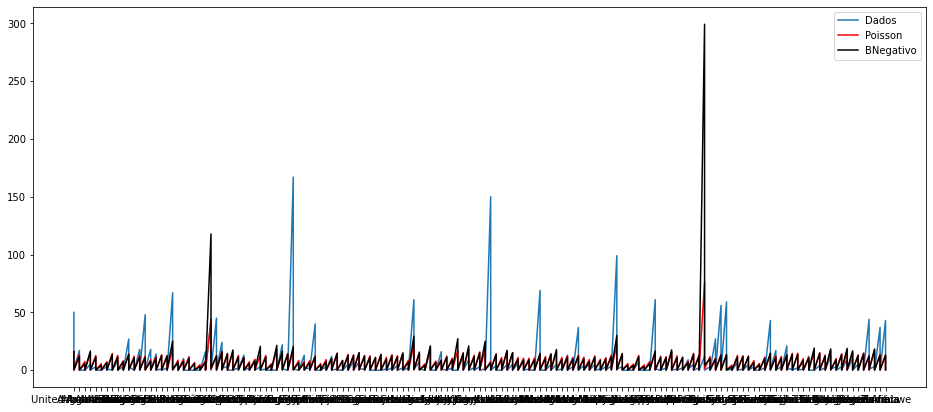

In [25]:
#Plot
plt.figure(figsize=(16, 7))
plt.plot(pred.Target)
plt.plot(pred.Pred_Poisson,color='red')
plt.plot(pred.Pred_BinomialNegativo,color='black')
plt.legend(['Dados','Poisson','BNegativo']);

**Observe que o modelo binomial negativo consegue capturar mais a discrepância dos dados**

# Novo Banco de dados 

**Criar um novo dataset 'corruption2', com quantidades de violações de trânsito iguais, no máximo, a 3. Este procedimento poderá, eventualmente, eliminar o fenômeno da superdispersão nos dados da variável dependente e, consequentemente, tornar as estimações dos modelos POISSON e BINOMIAL NEGATIVO praticamente iguais**

## $$Objetivo~2:$$  

## $$Verificar~se~ caso ~os~ dados ~tiverem~Equidispersão$$$$~os~modelos~Poisson~e~Binomial~Negativa~serão~iguais$$

In [26]:
# Carregando o dataset

corruption2 = pd.read_csv('corruption.csv',encoding='latin1',sep=',')
corruption2 = corruption2.set_index('country')
corruption2 =corruption2.iloc[:,1:]
corruption2 = corruption2[corruption2.violations<=3]
corruption2

,violations,staff,post,corruption
country,,,,
Angola,1,9,yes,1.047506
Albania,0,3,yes,0.921079
United Arab Emirates,0,3,no,-0.779468
United Arab Emirates,0,3,yes,-0.779468
Argentina,0,19,yes,0.223567
...,...,...,...,...
South Africa,1,19,yes,-0.415147
Zaire,3,6,no,1.582807
Zaire,0,6,yes,1.582807


**Tabela com 224 observações e 4 variáveis**

# Análise Exploratória

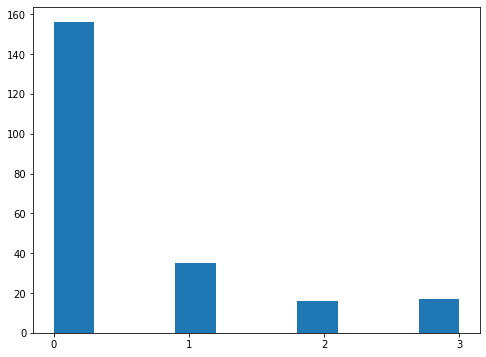

0    156
1     35
3     17
2     16
Name: violations, dtype: int64

In [27]:
#Frequencia dos dados da variável Target

plt.figure(figsize=(8, 6))
plt.hist(corruption2.violations)
plt.xticks([0, 1, 2,3]);
plt.show()
corruption2.violations.value_counts(ascending=False)

**Há pouca variação nos dados**

In [28]:
#Verificar a media e variância nos dados
me=corruption2.violations.mean()
import statistics as sts
va=sts.variance(corruption2.violations)
print(f'Media= {me}\nVariancia= {va}')

Media= 0.5267857142857143
Variancia= 0.8512972453555412


**Note que agora a média está muito próximo da variância (Equidispersão)**

## Modelagem

In [29]:
#Transformar a variável post em dummy
post_dum = pd.get_dummies(corruption2['post'],drop_first=True)
corruption2['Post_yes'] = post_dum
corruption2 = corruption2.drop('post',axis=1)
corruption2

,violations,staff,corruption,Post_yes
country,,,,
Angola,1,9,1.047506,1
Albania,0,3,0.921079,1
United Arab Emirates,0,3,-0.779468,0
United Arab Emirates,0,3,-0.779468,1
Argentina,0,19,0.223567,1
...,...,...,...,...
South Africa,1,19,-0.415147,1
Zaire,3,6,1.582807,0
Zaire,0,6,1.582807,1


**Modelo poisson só suporta variáveis numericas ou dummies**

In [30]:
#Separar as variáveis X e Y
x = corruption2.iloc[:,1:]
y = corruption2['violations']

# Modelo Poisson

In [31]:
#Modelo Poisson
import statsmodels.api as sm
from statsmodels.api import Poisson
x_intercept = sm.add_constant(x)
mod2 = sm.GLM(y.values,x_intercept, family=sm.families.Poisson())
modpoisson_2= mod2.fit()
print(modpoisson_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  224
Model:                            GLM   Df Residuals:                      220
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -179.47
Date:                Tue, 19 Jul 2022   Deviance:                       196.25
Time:                        11:50:25   Pearson chi2:                     243.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3919
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1322      0.145      0.909      0.3

**Note que a variável 'staff' não é estatisticamente significante a um nível de significância de 5%**

In [32]:
#Modelo Poisson sem a variável 'staff'

#Separar as variáveis X e Y
x = corruption2.iloc[:,2:]
y = corruption2['violations']

#Modelo Poisson
import statsmodels.api as sm
from statsmodels.api import Poisson
x_intercept = sm.add_constant(x)
mod3 = sm.GLM(y.values,x_intercept, family=sm.families.Poisson())
modpoisson_3= mod3.fit()
print(modpoisson_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  224
Model:                            GLM   Df Residuals:                      221
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -179.92
Date:                Tue, 19 Jul 2022   Deviance:                       197.16
Time:                        11:50:25   Pearson chi2:                     246.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3895
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2303      0.105      2.200      0.0

**Todas as variáveis são estatisticamente significantes para o modelo**

# Teste de Superdispersão(Utilizando o modelo Poisson)


In [33]:
#Criar a variável Y* utilizando os fitted values do modelo poisson
lambda_poi_2= modpoisson_3.predict(x_intercept)

ystars_2 = (((y - lambda_poi_2)**2) - y)/lambda_poi_2

#Teste de Superdispersão
import warnings
warnings.filterwarnings('ignore')

#Transformar a variavel y* em formato pandas para criação do modelo
ys_2 = pd.DataFrame(ystars_2)

#Add valor 0 na constante
x_int_lamda_2 = pd.DataFrame(x_intercept.const*0) 

# Unir a variável lambda com a constante 
x_int_lamda_2['lambda'] = pd.DataFrame(lambda_poi_2)

#3°Estimando o modelo auxiliar GLM sem o intercepto 
mod_reg_2 = sm.OLS(ys_2,x_int_lamda_2).fit()


#P_value do beta
print(f'P_value: {mod_reg_2.pvalues[1]}')

P_value: 0.7972586115610012


**P_value > 0.05, portanto verifica-se a Inexistência de superdispersão nos dados, estimação do modelo Poisson, vamos criar o modelo Binomial Negativa e comparar com o Poisson**

# Modelo Binomial Negativa

In [34]:
#Separar as variáveis X e Y
x = corruption2.iloc[:,2:]
y = corruption2['violations']


#Modelo 
import statsmodels.api as sm
from statsmodels.api import Poisson
x_intercept = sm.add_constant(x)
mod2 = sm.NegativeBinomial(y.values,x_intercept)
modbn_2= mod2.fit()
modbn_2.summary2()

Optimization terminated successfully.
         Current function value: 0.802794
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: NegativeBinomial
=================================================================
Model:              NegativeBinomial Pseudo R-squared: 0.179     
Dependent Variable: y                AIC:              367.6517  
Date:               2022-07-19 11:50 BIC:              381.2983  
No. Observations:   224              Log-Likelihood:   -179.83   
Df Model:           2                LL-Null:          -218.94   
Df Residuals:       221              LLR p-value:      1.0275e-17
Converged:          1.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          0.2305    0.1096   2.1028  0.0355   0.0157   0.4454
corruption     0.3181    0.0992   3.2071  0.0013   0.1237   0.5124
Post_yes      -2.0260    0.2267  -8.9381  0.0000  -2.4703  -1.5818
alpha          0.0749    0.1847   0.4056  0.6850  -0.2870   0.4368
=================================================================

"""

**Note que os 2 modelos contém as mesmas variáveis**

# Comparar as Métricas do modelo Poisson e Binomial Negativo

In [35]:
#Comparar o AIC e BIC
print('POISSON')
print(f'AIC: {modpoisson_3.aic}')
print(f'BIC: {modpoisson_3.bic_llf}')

print('\nBINOMIAL NEGATIVO')
print(f'AIC: {modbn_2.aic}')
print(f'BIC: {modbn_2.bic}')

POISSON
AIC: 365.83623347432507
BIC: 376.07117162989016

BINOMIAL NEGATIVO
AIC: 367.65167945706827
BIC: 381.29826366448845


In [36]:
##Comparar Loglik 
print('POISSON')
print(f'LogLik: {modpoisson_3.llf}')


print('\nBINOMIAL NEGATIVO')
print(f'LogLik: {modbn_2.llf}')

POISSON
LogLik: -179.91811673716253

BINOMIAL NEGATIVO
LogLik: -179.82583972853413


**Os valores das métricas dos 2 modelos são muito parecidas, vamos fazer o teste Likelihoo-ratio test para verificar se estatisticamente os 2 modelos são iguais**

In [37]:
#Teste para comparar modelos pelo loglik
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

def lrtest(llmin, llmax):
    lr = 2 * (llmax - llmin)
    p = stats.chisqprob(lr, 1) # llmax has 1 dof more than llmin
    return lr, p

lr, p_value = lrtest(modpoisson_3.llf,modbn_2.llf)
p_value

0.667488451523953

**p_value > 0.05, não rejeita a hipótese nula, os loglikes dos 2 modelos são estatisticamente iguais**

**OBS: A Ausência de superdierpesão nos dados faz com que os 2 modelos (Poisson ou Binomial Negativo) regridem a um modelo Poisson, portanto não há diferença estatística para escolha dos  modelos nestas condições**

**OBS2: As metricas usadas para verificar qual o melhor modelo são: BIC, AIC e Loglik, não usamos matriz de confusão**  

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

#  Poisson Inflacionados de Zero e BN Inflacionados de Zero

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo~2:$$  

## $$Verificar~se~ os ~modelos~ Zero ~Inflated~são~melhores$$$$que~os~modelos~Poisson~e~Binomial~Negativo$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

# Banco de dados 

In [38]:
#Mesma base de dados
dados

,violations,staff,corruption,Post_yes
country,,,,
Angola,50,9,1.047506,0
Angola,1,9,1.047506,1
Albania,17,3,0.921079,0
Albania,0,3,0.921079,1
United Arab Emirates,0,3,-0.779468,0
...,...,...,...,...
Zaire,0,6,1.582807,1
Zambia,37,9,0.562193,0
Zambia,0,9,0.562193,1


**Tabela com 298 observações e 4 variáveis**

# Estimação do Modelo Poisson Inflacionados de Zero

No modelo Zero Inflated, temos que indicar a/as variáveis explicativas que potencialmente pode estar relacionadas com a geração dos zeros estruturais (Bernulli) e as variáveis que compõem os dados de contagem (Variável Explicativas e Resposta)

In [39]:
#Separar as variáveis X e Y
x = dados.iloc[:,1:]
y = dados['violations']

#Modelo
import statsmodels.api as sm
from statsmodels.api import Poisson
import warnings
warnings.filterwarnings('ignore')
x_intercept = sm.add_constant(x)
mod1 = sm.ZeroInflatedPoisson(endog=y.values,exog=x_intercept,exog_infl=x_intercept,inflation='logit')
modpoissonzero= mod1.fit()
print(modpoissonzero.summary())

         Current function value: 5.976352
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                       y   No. Observations:                  298
Model:             ZeroInflatedPoisson   Df Residuals:                      294
Method:                            MLE   Df Model:                            3
Date:                 Tue, 19 Jul 2022   Pseudo R-squ.:                  0.1977
Time:                         11:50:25   Log-Likelihood:                -1781.0
converged:                       False   LL-Null:                       -2219.8
Covariance Type:             nonrobust   LLR p-value:                6.190e-190
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inflate_const         -1.3823      0.390     -3.547 

**Repare que o modelo separa o output em 2 partes, uma para o modelo de Inflação de zeros(Bernulli) outro para dados de contagem**

**Observamos que as variáveis 'staff' e 'Post_yes' não são estatisticamente significantes no modelo Zero Inflated, vamos excluir essa variável do modelo Zero Inflated e deixar apenas nos dados de contagem**

In [40]:
#2° Modelo somente com a variável explicativa 'corruption' no modelo Zero Inflated

#Separar as variáveis X e Y
x = dados.iloc[:,1:]
y = dados['violations']
x_inflated = x_intercept[['const','corruption']]

#Modelo
import warnings
warnings.filterwarnings('ignore')
x_intercept = sm.add_constant(x)
mod2 = sm.ZeroInflatedPoisson(endog=y.values,exog=x_intercept,exog_infl=x_inflated,inflation='logit')
modpoissonzero_2= mod2.fit()
print(modpoissonzero_2.summary())

Optimization terminated successfully.
         Current function value: 5.977545
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                       y   No. Observations:                  298
Model:             ZeroInflatedPoisson   Df Residuals:                      294
Method:                            MLE   Df Model:                            3
Date:                 Tue, 19 Jul 2022   Pseudo R-squ.:                  0.1975
Time:                         11:50:25   Log-Likelihood:                -1781.3
converged:                        True   LL-Null:                       -2219.8
Covariance Type:             nonrobust   LLR p-value:                8.828e-190
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inflate_const 

**Todas as variáveis são estatisticamente significantes para o modelo**

**O Coeficiente Inflate compara a variável com a consequência da ocorrência de zeros, EX: inflate_corruption quer dizer que a medida que o valor da corrupção aumenta diminui em -0.9523 probabilidade da ocorrência de Zeros**

## Coeficientes

In [41]:
#Gama
gama = modpoissonzero_2.params.inflate_const
gama

-1.6116490435846256

**É como se fosse o parâmetro intercepto da regressão linear, porém do modelo Zero Inflated**

In [42]:
#Delta1
delta1 = modpoissonzero_2.params.inflate_corruption
delta1

-0.9523153874735848

**É o parâmetro beta da variável explicativa, porém do modelo Zero Inflated**

In [43]:
#LogLike Poisson 
loglikepoisson= modpoissonzero_2.llf
loglikepoisson

-1781.3084254158427

# Teste de Vuong
- Verificar se existe inflação de zeros ao comparar os dois modelos (POISSON X ZIP),se o teste der < 0.05 os dados possui inflação de zeros




In [44]:
#Modelo Poisson

#Separar as variáveis X e Y
x = dados.iloc[:,1:]
y = dados['violations']

#Modelo
mod_poisson = sm.GLM(y.values,x_intercept, family=sm.families.Poisson())
mod_poisson= mod_poisson.fit()

#Comparar os 2 Logliks

print(f'Poisson: {mod_poisson.llf}')
print(f'Poisson_zero_Infleted: {modpoissonzero_2.llf}')

Poisson: -2071.7937527648533
Poisson_zero_Infleted: -1781.3084254158427


## Teste Chi² 

- Podemos comprar os loglikes dos modelo Poisson e ZIP através do teste Chi², caso o valor seja < 0.05 os dados possuem inflação de zeros

In [45]:
#Teste Chi² para comparar os modelos
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

def lrtest(llmin, llmax):
    lr = 2 * (llmax - llmin)
    p = stats.chisqprob(lr, 2) # llmax has 1 dof more than llmin
    return lr, p

lr, p_value = lrtest(mod_poisson.llf,modpoissonzero_2.llf)
round(p_value,5)

0.0

**P_value < 0.05, rejeita a hipótese nula de que não há inflação de zeros no modelo**

In [46]:
#Previsão do Modelo Poisson inflacionados de zeros
zip_predictions = modpoissonzero_2.predict(x_intercept, exog_infl = x_inflated)
zip_predictions

country
Angola                  14.823562
Angola                   0.203580
Albania                 12.877979
Albania                  0.176860
United Arab Emirates     8.379367
                          ...    
Zaire                    0.207250
Zambia                  13.616058
Zambia                   0.186996
Zimbabwe                13.732195
Zimbabwe                 0.188591
Length: 298, dtype: float64

# Modelo Binomial Negativo Inflacionados de Zero

- **Theta, Plogit , Lambda ,Delta e Betas** = Parâmetros da distribuição dos dados

In [47]:
#Avaliar apenas a variável corruption em relação a não ocorrência de zeros
#Separar as variáveis X e Y
x = dados.iloc[:,1:]
y = dados['violations']
x_inflated = x_intercept[['const','corruption']]

#Modelo
x_intercept = sm.add_constant(x)
mod3 = sm.ZeroInflatedNegativeBinomialP(endog=y.values,exog=x_intercept,exog_infl=x_inflated)
modbnzero= mod3.fit()
print(modbnzero.summary())

         Current function value: 1.870015
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                                 y   No. Observations:                  298
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                      294
Method:                                      MLE   Df Model:                            3
Date:                           Tue, 19 Jul 2022   Pseudo R-squ.:                  0.1700
Time:                                   11:50:26   Log-Likelihood:                -557.26
converged:                                 False   LL-Null:                       -671.37
Covariance Type:                       nonrobust   LLR p-value:                 3.353e-49
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

**Variável 'corruption' não é estatisticamente significante para o modelo de dados de contagem, porém para fins didáticos vamos continuar com a variável**

## Parâmetros 

In [48]:
#Gama
gama = modbnzero.params.inflate_const
gama

-17.985682323772302

**É como se fosse o parâmetro intercepto da regressão linear, porém do modelo Zero Inflated**

In [49]:
#Delta1 = inflate_corruption
delta1 = modbnzero.params.inflate_corruption
delta1

-8.110426223803392

**É o parâmetro beta da variável explicativa, porém do modelo Zero Inflated**

In [50]:
#Tetha (o inverso do alpha(Phi))
print(f'Tetha: {1/modbnzero.params.alpha}')

#Phi (o inverso do Tetha)
print(f'\nPhi:   {modbnzero.params.alpha}')

Tetha: 0.5387885008612436

Phi:   1.8560158548326815


In [51]:
#Loglik
modbnzero.llf

-557.2643681326408

# Teste de Vuong
- Verificar se existe inflaçao de zeros ao comparar dois modelos (BN X ZINB),se o teste der <0.05 os dados possui inflação de zeros


In [52]:
#Modelo BN

#Separar as variáveis X e Y
x = dados.iloc[:,1:]
y = dados['violations']

#Modelo
mod4 = sm.GLM(y.values,x_intercept, family=sm.families.NegativeBinomial(alpha=phi))
modbn_2= mod4.fit()


print(f'BN: {modbn_2.llf}')
print(f'BNZeroInflated: {modbnzero.llf}')

BN: -567.401171666372
BNZeroInflated: -557.2643681326408


## Chi²

In [53]:
#Verificar se os 2 loglikes tem diferença estatistica
from scipy.stats.distributions import chi2
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))


LR = likelihood_ratio(modbn_2.llf,modbnzero.llf)


p = chi2.sf(LR, 2) # L2 has 1 DoF more than L1
p

3.959516537166398e-05

**P_value < 0.05, rejeita a hipótese nula de que não a inflação de zeros no modelo**

In [54]:
#Previsão do modelo
modbnzero.predict(x_intercept, exog_infl = x_inflated)

country
Angola                  13.358543
Angola                   0.187939
Albania                 10.203814
Albania                  0.143555
United Arab Emirates     7.494531
                          ...    
Zaire                    0.183098
Zambia                  12.232444
Zambia                   0.172096
Zimbabwe                13.896783
Zimbabwe                 0.195511
Length: 298, dtype: float64

**Previsão do modelo Zero Inflated**

# Comparação dos loglikes dos modelos

In [55]:
#Criar um dataframe com todos loglikes para comparar
logl =[int(modpoisson.llf),int(modbn.llf),int(modpoissonzero_2.llf),int(modbnzero.llf)]
name_l =['Poisson','Bnegativo','Poisson_Inflat','BN_Inflated']
loglik = pd.DataFrame(logl,name_l)
loglik.columns =['LogLikes']
loglik['Algoritimos'] = loglik.index
loglik

,LogLikes,Algoritimos
Poisson,-2071,Poisson
Bnegativo,-567,Bnegativo
Poisson_Inflat,-1781,Poisson_Inflat
BN_Inflated,-557,BN_Inflated


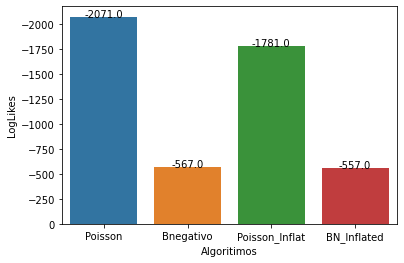

In [56]:
import seaborn as sns
f = sns.barplot(data=loglik,x='Algoritimos',y ='LogLikes')
plt.gca().invert_yaxis()
for i in f.patches:
    f.annotate(i.get_height(),
          (i.get_x()+i.get_width()/2,i.get_height()),
              ha='center')

**Os modelos BN e BN Zero Inflated foram os melhores modelos pela métrica loglike**

## Previsão dos modelos

In [57]:
prev =  pd.DataFrame(modpoisson.predict(x_intercept),columns=['fitted_ModPoisson'])
prev['fitted_ModBN'] = modbn.predict(x_intercept)
prev['fitted_modZIP'] = modpoissonzero_2.predict(x_intercept,exog_infl = x_inflated)
prev['fitted_modZINP'] = modbnzero.predict(x_intercept,exog_infl = x_inflated)
prev['y'] = dados['violations']
prev

,fitted_ModPoisson,fitted_ModBN,fitted_modZIP,fitted_modZINP,y
country,,,,,
Angola,15.919915,16.138708,14.823562,13.358543,50
Angola,0.216711,0.224608,0.203580,0.187939,1
Albania,13.371720,11.987745,12.877979,10.203814,17
Albania,0.182023,0.166838,0.176860,0.143555,0
United Arab Emirates,7.477915,5.551744,8.379367,7.494531,0
...,...,...,...,...,...
Zaire,0.243691,0.253817,0.207250,0.183098,0
Zambia,13.486751,12.955729,13.616058,12.232444,37
Zambia,0.183589,0.180310,0.186996,0.172096,0


**Valor das previsões dos 4 modelos de dados de contagem**

# Conclusão 

**Note que os modelos Binomial Negativo e Binomial Negativo zero inflated se ajustaram melhores aos dados do que os modelos Poisson e Poisson zero inflated, a ocorrência de zero inflated nos dados fez com que o modelos BN zero inflated se adequasse mais aos dados**